In [ ]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()

# 업로드한 파일의 이름 확인
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')


Saving universal_top_spotify_songs.csv to universal_top_spotify_songs.csv
Uploaded file: universal_top_spotify_songs.csv


In [ ]:
import pandas as pd

# 데이터셋 로드
file_path = 'universal_top_spotify_songs.csv'
data = pd.read_csv(file_path)

# 데이터프레임의 요약 정보 출력
data.info()

# 데이터프레임의 처음 몇 행을 표시
data.head()
# 출력된 정보 및 행 확인


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127306 entries, 0 to 127305
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   spotify_id          127306 non-null  object 
 1   name                127285 non-null  object 
 2   artists             127285 non-null  object 
 3   daily_rank          127306 non-null  int64  
 4   daily_movement      127306 non-null  int64  
 5   weekly_movement     127306 non-null  int64  
 6   country             125600 non-null  object 
 7   snapshot_date       127306 non-null  object 
 8   popularity          127306 non-null  int64  
 9   is_explicit         127306 non-null  bool   
 10  duration_ms         127306 non-null  int64  
 11  album_name          127283 non-null  object 
 12  album_release_date  127283 non-null  object 
 13  danceability        127306 non-null  float64
 14  energy              127306 non-null  float64
 15  key                 127306 non-nul

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,1,0,0,NaN,2023-11-21,100,True,...,6,-3.180,0,0.0319,0.256,0.000000,0.1140,0.844,111.018,1
1,3vkCueOmm7xQDoJ17W1Pm3,My Love Mine All Mine,Mitski,2,0,4,NaN,2023-11-21,97,False,...,9,-14.958,1,0.0321,0.868,0.135000,0.1580,0.121,113.950,4
2,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,3,0,0,NaN,2023-11-21,99,False,...,9,-5.707,1,0.1570,0.117,0.000021,0.1050,0.564,169.994,4
3,2HRgqmZQC0MC7GeNuDIXHN,Seven (feat. Latto) (Explicit Ver.),"Jung Kook, Latto",4,0,1,NaN,2023-11-21,88,True,...,11,-4.185,1,0.0440,0.312,0.000000,0.0797,0.872,124.987,4
4,2HafqoJbgXdtjwCOvNEF14,Si No Estás,iñigo quintero,5,-3,-1,NaN,2023-11-21,99,False,...,5,-8.720,1,0.0285,0.827,0.000000,0.1380,0.524,98.224,4


In [ ]:
import pandas as pd

# 데이터셋 로드
file_path = 'universal_top_spotify_songs.csv'
data = pd.read_csv(file_path)

# 데이터프레임의 처음 몇 행을 표시
data.head()

# 데이터셋에서 결측치 확인
missing_values = data.isnull().sum()
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

# 각 열의 결측치 개수 및 비율 출력
missing_data_summary = pd.DataFrame({'결측치 개수': missing_values, '비율 (%)': missing_values_percentage})
missing_data_summary.sort_values(by='비율 (%)', ascending=False)
# 결측치 정보를 확인


,결측치 개수,비율 (%)
country,1706,1.340078
album_release_date,23,0.018067
album_name,23,0.018067
artists,21,0.016496
name,21,0.016496
key,0,0.000000
tempo,0,0.000000
valence,0,0.000000
liveness,0,0.000000
instrumentalness,0,0.000000


In [ ]:
# 결측치가 있는 행 제거
cleaned_data = data.dropna(subset=['country', 'album_release_date', 'album_name', 'artists', 'name'])

# 결측치 재확인
cleaned_missing_values = cleaned_data.isnull().sum()

cleaned_missing_values
# 결측치가 제거된 데이터프레임에서의 결측치 정보 확인


spotify_id            0
name                  0
artists               0
daily_rank            0
daily_movement        0
weekly_movement       0
country               0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_name            0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64

In [ ]:
import numpy as np
import pandas as pd

# 데이터셋 로드
file_path = 'universal_top_spotify_songs.csv'
data = pd.read_csv(file_path)

# 'country' 열에서 고유 국가 코드 추출
unique_countries = data['country'].unique()

# NaN 값이 있다면 제외
unique_countries = unique_countries[~pd.isna(unique_countries)]

# 국가 목록에 'Global' 추가
unique_countries = np.append(unique_countries, 'Global')

# 고유 국가 코드 목록 출력
unique_countries.sort()
print(unique_countries)
# 출력된 목록을 확인


['AE' 'AR' 'AT' 'AU' 'BE' 'BG' 'BO' 'BR' 'BY' 'CA' 'CH' 'CL' 'CO' 'CR'
 'CZ' 'DE' 'DK' 'DO' 'EC' 'EE' 'EG' 'ES' 'FI' 'FR' 'GB' 'GR' 'GT' 'Global'
 'HK' 'HN' 'HU' 'ID' 'IE' 'IL' 'IN' 'IS' 'IT' 'JP' 'KR' 'KZ' 'LT' 'LU'
 'LV' 'MA' 'MX' 'MY' 'NG' 'NI' 'NL' 'NO' 'NZ' 'PA' 'PE' 'PH' 'PK' 'PL'
 'PT' 'PY' 'RO' 'SA' 'SE' 'SG' 'SK' 'SV' 'TH' 'TR' 'TW' 'UA' 'US' 'UY'
 'VE' 'VN' 'ZA']


In [ ]:
def find_top_song_in_country(df, country_codes):
    """
    사용자에게 유효한 국가 코드를 입력하도록 요청하고 해당 국가에서 가장 많이 1순위에 올랐던 노래를 찾기
    """
    while True:
        # 사용자 입력
        country_input = input("Enter a country code (or 'Global'): ").upper()

        # 입력이 국가 코드 목록에 있는지 확인
        if country_input in country_codes:
            # DataFrame을 선택된 국가 및 1순위로 필터링
            country_df = df[(df['country'] == country_input) & (df['daily_rank'] == 1)]
            if country_input == 'Global':
                country_df = df[df['daily_rank'] == 1]

            #  가장 자주 나타나는 노래 제목 찾기
            top_song = country_df['name'].mode().iloc[0]
            return top_song
        else:
            print("Invalid country code. Please try again.")





In [ ]:
top_song = find_top_song_in_country(cleaned_data, unique_countries)
print("The song that has been number one the most times is:", top_song)

Enter a country code (or 'Global'): ca
The song that has been number one the most times is: Is It Over Now? (Taylor's Version) (From The Vault)


In [ ]:
# 데이터셋에서 날짜 범위 찾기
min_date = cleaned_data['snapshot_date'].min()
max_date = cleaned_data['snapshot_date'].max()

min_date, max_date
# 찾은 최소 및 최대 날짜 출력


('2023-10-18', '2023-11-21')

In [ ]:
from datetime import datetime

def find_global_top_song_on_date(df, min_date, max_date):
    """
    사용자에게 허용된 범위 내의 유효한 날짜를 입력하도록 요청하고 해당 날짜의 글로벌 최상위 노래를 찾기
    """
    date_format = "%Y-%m-%d"

    while True:
        # 사용자 입력 요청
        date_input = input(f"날짜를 'yyyy-mm-dd' 형식으로 입력하세요 ({min_date}부터 {max_date} 사이): ")

        # 입력이 유효한 날짜이고 범위 내에 있는지 확인
        try:
            input_date = datetime.strptime(date_input, date_format)
            if min_date <= date_input <= max_date:
                # DataFrame을 선택된 날짜 및 1순위로 필터링
                date_df = df[(df['snapshot_date'] == date_input) & (df['daily_rank'] == 1)]
                top_song = date_df[['name', 'artists']].mode().iloc[0]
                return top_song
            else:
                print(f"날짜는 {min_date}부터 {max_date} 사이어야 합니다. 다시 시도하세요.")
        except ValueError:
            print("유효하지 않은 날짜 형식입니다. 다시 시도하세요.")







In [ ]:
top_song_info = find_global_top_song_on_date(cleaned_data, min_date, max_date)
print(f"The global top song on {top_song_info['name']} by {top_song_info['artists']}")


날짜를 'yyyy-mm-dd' 형식으로 입력하세요 (2023-10-18부터 2023-11-21 사이): ㅁㅇㄴㅁㅇㅁㄴㅇ
유효하지 않은 날짜 형식입니다. 다시 시도하세요.
날짜를 'yyyy-mm-dd' 형식으로 입력하세요 (2023-10-18부터 2023-11-21 사이): 2023-11-21
The global top song on PERRO NEGRO by Bad Bunny, Feid


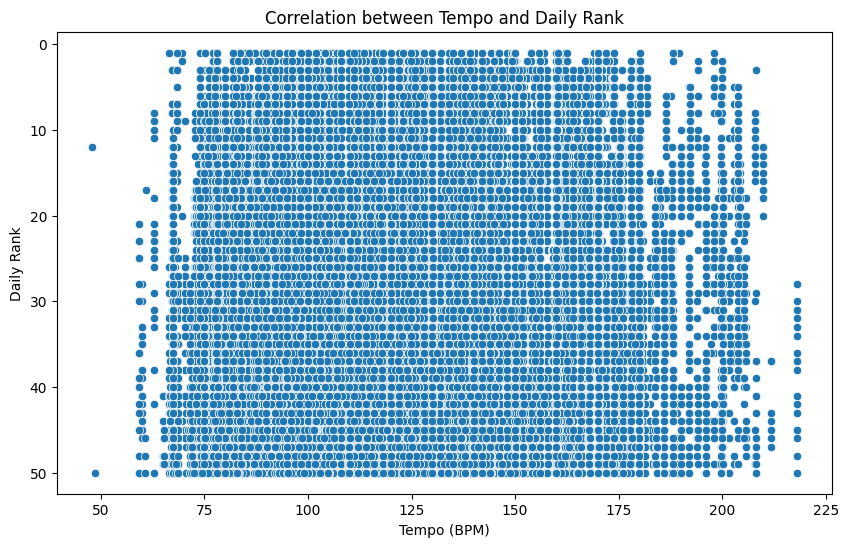

0.00918704725219001

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관 관계 계산
correlation = cleaned_data['tempo'].corr(cleaned_data['daily_rank'])

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='daily_rank', data=cleaned_data)

# 그래프 제목 및 라벨 추가
plt.title('Correlation between Tempo and Daily Rank')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Daily Rank')

# 그래표 표시
plt.gca().invert_yaxis() # 이해를 돕기 위해 y-축 뒤집기 (낮은 랭크가 더 좋음
plt.show()

correlation
#그래프와 상관 관계 값 출력

In [ ]:
import random

class Playlist:
    def __init__(self, df, country_code):
        """
        주어진 나라의 상위 50곡 중에서 무작위로 10곡을 선택하여 플레이리스트를 초기화
        """
        # 주어진 나라 및 상위 50곡을 필터링합니다.
        country_songs = df[(df['country'] == country_code) & (df['daily_rank'] <= 50)]

        # 10곡을 무작위로 선택합니다.
        self.songs = country_songs.sample(n=10, random_state=1)
        self.current_song_index = 0

    def get_current_song(self):
        """ 현재 곡의 정보를 출력 """
        if not self.songs.empty:
            current_song = self.songs.iloc[self.current_song_index]
            print(f"현재 곡: '{current_song['name']}' by {current_song['artists']}")
        else:
            print("플레이리스트가 비어 있습니다.")

    def get_all_songs(self):
        """ 플레이리스트의 모든 곡을 출력 """
        if not self.songs.empty:
            print("플레이리스트의 곡들:")
            for index, song in self.songs.iterrows():
                print(f"- '{song['name']}' by {song['artists']}")
        else:
            print("플레이리스트가 비어 있습니다.")

    def next(self):
        """ 플레이리스트에서 다음 곡으로 이동 """
        if not self.songs.empty:
            self.current_song_index = (self.current_song_index + 1) % len(self.songs)
            self.get_current_song()
        else:
            print("플레이리스트가 비어 있습니다.")

    def previous(self):
        """ 플레이리스트에서 이전 곡으로 이동 """
        if not self.songs.empty:
            self.current_song_index = (self.current_song_index - 1) % len(self.songs)
            self.get_current_song()
        else:
            print("플레이리스트가 비어 있습니다.")



In [ ]:
my_playlist = Playlist(cleaned_data, 'US')  # 미국(US)에 대한 플레이리스트 생성
my_playlist.get_current_song()  # 현재 곡 정보 출력
my_playlist.next()  # 다음 곡으로 이동
my_playlist.previous()  # 이전 곡으로 이동
my_playlist.get_all_songs()  # 플레이리스트의 모든 곡 출력


현재 곡: 'Paint The Town Red' by Doja Cat
현재 곡: 'This Is Halloween' by The Citizens of Halloween
현재 곡: 'Paint The Town Red' by Doja Cat
플레이리스트의 곡들:
- 'Paint The Town Red' by Doja Cat
- 'This Is Halloween' by The Citizens of Halloween
- 'Don’t Blame Me' by Taylor Swift
- 'Cruel Summer' by Taylor Swift
- 'QLONA' by KAROL G, Peso Pluma
- 'All I Want for Christmas Is You' by Mariah Carey
- 'Shake It Off (Taylor's Version)' by Taylor Swift
- 'Now That We Don't Talk (Taylor's Version) (From The Vault)' by Taylor Swift
- 'Water' by Tyla
- 'Ella Baila Sola' by Eslabon Armado, Peso Pluma
